<a href="https://colab.research.google.com/github/repitta/CienciaDeDadosEducacionais/blob/master/LOP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Analíse dos dados do sistema LOP

Nesse projeto iremos fazer a análise exploratória de dados e suas representações visuais, que  engloba um conjunto de estatísticas quantitativas e gráficas que nos mostram as tendências, detectam comportamentos, testam a validade de hipóteses e fazem vários outros estudos.

Para esta análise, vamos utilizar os dados fornecidos pelo sistema LOP - Plataforma de gerenciamento de exercícios de programação da Escola de Ciência e Tecnolgia da  Universidade Federal do Rio Grande do Norte (UFRN) e investigar os fatores que influenciam o desempenho dos alunos do Bacharelado em Ciência e Tecnologia.

Assim, algumas questões que serão uma base para o nosso estudo podem ser levantadas:

1. Como o sucesso dos alunos tem sido ao longo dos anos?
2.  Uma configuração (tamanho, horário) da classe influencia  nesse desempenho?
3. Quais habilidades são aprendidas pelos alunos? (Perseverança,  Raciocínio Lógico, Atenção aos detalhes, Pensamento Abstrato )
4. Qual o perfil dos alunos?
5. Quais os estilos de aprendizagem?
6. E finalmente, qual a influência da  autorregulação da aprendizagem do aluno no seu redimento?




E tendo respondido a essas perguntas que, ao longo deste trabalho, geraremos gráficos e tabelas que relacionam a média dos alunos e o número de alunos aprovados e reprovados de  ???  a 2019.1 com elementos como:

* O número de alunos por turma;
* O turno de aula;
* A quantidade de exercícios repondidos;
*A frequência que o aluno responde as atividades;
* E a quantidade de ausências de estudantes.
*Quantidade de linhas do código? 

**Importa as bibliotecas**

In [0]:
import pandas as pd
from csv import reader


**Ler os arquivo CSV que foram gerados a partir do banco de dados do sistema LOP**

In [0]:
lop_users = pd.read_csv("lop.users.csv")
lop_turmas = pd.read_csv("lop.turmas.csv")
lop_listas = pd.read_csv("lop.listasExercicios.csv")
lop_sub = pd.read_csv("lop.submissoes.csv")

**Selecionar as colunas com os dados que serão utilizados no estudo**

In [0]:
#Tabela Usuários - tab_user armazena as colunas "_id", "matricula", "nome" 
tab_user = lop_users[["_id", "matricula", "nome"]]

#Tabela Turmas - tab_turmas armazena as colunas __id", "anoPeriodoString", "descricaoHorario","descricaoTurma", "matricula"
tab_turmas = lop_turmas [["_id", "anoPeriodoString", "descricaoHorario","descricaoTurma"]]
matricula = []
for j in range(len(tab_turmas)):
  id_matriculat =[]
  for i in range(30):
    id_matriculat.append(lop_turmas["dicentes."+str(i)+".matricula"][j])
  matricula.append(id_matriculat)
tab_turmas["matricula"] = pd.Series(list(matricula))

#Tabela Listas - tab_listas armazena as colunas "id","questoes, titulo"
tab_listas = lop_listas [["_id","titulo"]]
id_lista = []
for j in range(23):
  id_questoes =[]
  for i in range(19):
    id_questoes.append(lop_listas["questoes."+str(i)][j])
  id_lista.append(id_questoes)
tab_listas["questao"] = pd.Series(id_lista)

#Tabela Submissoes - tab_sub armazena as colunas "data","porcentagemAcerto","questao", "user"
tab_sub = lop_sub [["data","porcentagemAcerto","questao", "user"]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Estrutura da cada dataframe após a seleção dos dados**

In [0]:
print("Tabelas de Usuários Colunas \n",tab_user.columns, tab_user.shape)
print("Tabelas de Turmas Colunas \n",tab_turmas.columns, tab_turmas.shape)
print("Tabelas de Listas Colunas \n",tab_listas.columns, tab_listas.shape)
print("Tabelas de Submissoes Colunas \n",tab_sub.columns, tab_sub.shape)

Tabelas de Usuários Colunas 
 Index(['_id', 'matricula', 'nome'], dtype='object') (1063, 3)
Tabelas de Turmas Colunas 
 Index(['_id', 'anoPeriodoString', 'descricaoHorario', 'descricaoTurma',
       'matricula'],
      dtype='object') (44, 5)
Tabelas de Listas Colunas 
 Index(['_id', 'titulo', 'questao'], dtype='object') (23, 3)
Tabelas de Submissoes Colunas 
 Index(['data', 'porcentagemAcerto', 'questao', 'user'], dtype='object') (32273, 4)


**Transformar os dados da tabela User**

In [0]:
#Transformando todas as colunas_id e nome em strings e matricula em float
tab_user["_id"] = tab_user["_id"].astype(str)
tab_user["matricula"] = tab_user["matricula"].astype(str)
tab_user["nome"] = tab_user["nome"].astype(str).str.upper()

#renomeando a coluna _id para idAluno
tab_user.rename(columns={"_id":"id_aluno"}, inplace=True)

#Limpando a coluna matricula, onde tem .0 no final da matricula foi retirado, tive q fazer uma gambiarra pq ele estva entendendo .0 como uma expressao regular
tab_user["matricula"] = tab_user["matricula"].str.replace(".","r")
tab_user["matricula"] = tab_user["matricula"].str.replace("r0","")


#imprimir os dados da tabela User
print(tab_user.info())
tab_user.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 3 columns):
id_aluno     1063 non-null object
matricula    1063 non-null object
nome         1063 non-null object
dtypes: object(3)
memory usage: 25.0+ KB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,id_aluno,matricula,nome
0,598cd5453bc48946977dcf66,2013023070,GABRIEL TIBÚRCIO
1,598cd8b823daeb4b50a4b254,1943220,ORIVALDO
2,599155ebb3333c31b7a01e5b,12345678,PROFESSOR JOÃO
3,5991cb910be9d42f2f68b906,20170039453,AMANDA
4,5991cd1a8907ca2f441cd313,20170038394,EMANUEL FERNANDES P. DA ROCHA


**Expandi a tabela turmas para que cada aluno seja uma linha do dataframe**

In [0]:
colunas = ["id_turma","ano","descricaoHorario","descricaoTurma","matricula"]
turmasNovo = pd.DataFrame(columns=colunas)
for i in range(44):
  id_turma=tab_turmas["_id"].iloc[i]
  ano=tab_turmas["anoPeriodoString"].iloc[i]
  descricaoHorario= tab_turmas["descricaoHorario"].iloc[i]
  descricaoTurma= tab_turmas["descricaoTurma"].iloc[i]
  m=tab_turmas["matricula"].iloc[i]
  for a in range(30):
      matricula=m[a]
      dic = {"id_turma": id_turma ,"ano": ano ,"descricaoTurma":descricaoTurma , "descricaoHorario":descricaoHorario, "matricula":matricula}
      turmasNovo = pd.concat([turmasNovo, pd.DataFrame(dic, index=[0])],  ignore_index=True )
    
print(turmasNovo.shape)
turmasNovo.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if sys.path[0] == '':


(1320, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 5 columns):
ano                 1320 non-null float64
descricaoHorario    1320 non-null object
descricaoTurma      1320 non-null object
id_turma            1320 non-null object
matricula           1028 non-null object
dtypes: float64(1), object(4)
memory usage: 51.6+ KB


**Apagar os registros onde o campo da coluna Matricula é nulo**

In [0]:
turmasNovo = turmasNovo.dropna(axis=0, how='any')
print(turmasNovo.shape)
turmasNovo.info()

(1028, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1319
Data columns (total 5 columns):
ano                 1028 non-null float64
descricaoHorario    1028 non-null object
descricaoTurma      1028 non-null object
id_turma            1028 non-null object
matricula           1028 non-null object
dtypes: float64(1), object(4)
memory usage: 48.2+ KB


**Transformar os dados da tabela Turmas**

In [0]:
#Transformando as colunas em string
turmasNovo["descricaoHorario"] =turmasNovo['descricaoHorario'].astype(str)
turmasNovo["descricaoTurma"] =turmasNovo['descricaoTurma'].astype(str)
turmasNovo["id_turma"] =turmasNovo['id_turma'].astype(str)
turmasNovo["matricula"] =turmasNovo['matricula'].astype(str)                                   
#Retirando o .0 da coluna matricula
turmasNovo["matricula"] = turmasNovo["matricula"].str.replace(".","r")
turmasNovo["matricula"] = turmasNovo["matricula"].str.replace("r0","")

print(turmasNovo.info())
print(turmasNovo.head()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1319
Data columns (total 5 columns):
ano                 1028 non-null float64
descricaoHorario    1028 non-null object
descricaoTurma      1028 non-null object
id_turma            1028 non-null object
matricula           1028 non-null object
dtypes: float64(1), object(4)
memory usage: 48.2+ KB
None
      ano  ...    matricula
0  2017.2  ...  20170106538
1  2017.2  ...  20170039453
2  2017.2  ...  20170044776
3  2017.2  ...  20170031473
4  2017.2  ...  20170032274

[5 rows x 5 columns]


**Tem matriculas em mais de uma turma**

In [0]:
#total de matriculas únicas 
print("Total de matriculas únicas: ",  turmasNovo["matricula"].unique().shape)
resultado = turmasNovo.groupby(["matricula"]).count()
resultado = resultado.reset_index()
print(resultado.loc[resultado["id_turma"]==3,"matricula"])
# tem 917 matriculas em estão em apenas 1 turma 
# tem 80 matriculas que estão em 2 turmas cadastradas
# tem 14 matriculas que estão em 3 turmas cadastradas



Total de matriculas únicas:  (917,)
19      2015010295
72      2016012150
83     20160141847
85     20160142011
131     2016020670
146     2016097424
159    20170030494
275    20170036059
289    20170036792
330    20170039551
347    20170041110
399    20170044810
526    20170138442
575    20170183297
Name: matricula, dtype: object


**Montar uma turma por ano e descrição**

In [0]:
turmasNovoAno=turmasNovo.loc[turmasNovo["ano"] == 2018.2, ["matricula","descricaoTurma","ano"]] 
turmaDescricao = turmasNovoAno.loc[turmasNovoAno["descricaoTurma"].str.contains('Turma 03A', regex=False), ["matricula","descricaoTurma","ano"]]
print(turmaDescricao.sort_values(by=['matricula']))
print("Quantidade de alunos ", turmaDescricao.shape)

       matricula                     descricaoTurma     ano
745  20180029933  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
722  20180030059  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
749  20180030193  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
730  20180030498  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
728  20180030658  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
721  20180030836  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
734  20180031637  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
742  20180032518  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
732  20180032554  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
748  20180032714  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
740  20180032877  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
747  20180033337  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
739  20180033391  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
737  20180034030  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
746  20180035411  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2018.2
738  20180035494  LÓGICA DE PROGRAMAÇÃO 

**Concatenar a tabela usuarios com a tabela turmas pela coluna matricula**

In [0]:
merge_user_turmas = pd.merge(right = tab_user, left = turmasNovo, on='matricula', how="left")
print("Quantidade de matriculas em user ",tab_user["matricula"].shape )
print("Quantidade de matriculas em turmasNovo ",turmasNovo["matricula"].shape )
print("Quantidade de matriculas depois de juntar as tabelas user e turmas ",merge_user_turmas["matricula"].shape )
# Existem matriculas na tabela turmas que não se cadastraram no sistema?

Quantidade de matriculas em user  (1063,)
Quantidade de matriculas em turmasNovo  (1028,)
Quantidade de matriculas depois de juntar as tabelas user e turmas  (1028,)


In [0]:
merge_user_turmas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1028 entries, 0 to 1027
Data columns (total 7 columns):
ano                 1028 non-null float64
descricaoHorario    1028 non-null object
descricaoTurma      1028 non-null object
id_turma            1028 non-null object
matricula           1028 non-null object
id_aluno            936 non-null object
nome                936 non-null object
dtypes: float64(1), object(6)
memory usage: 64.2+ KB


In [0]:
# Existem 92 matriculas que não tem registro no sistema
print(merge_user_turmas.loc[merge_user_turmas["id_aluno"].isna(), ["id_aluno","matricula", "descricaoTurma", "ano"]].sort_values(by=['matricula']))

    id_aluno    matricula                     descricaoTurma     ano
246      NaN   2012927879  LÓGICA DE PROGRAMAÇÃO - Turma 03A  2017.2
189      NaN   2014047915  LÓGICA DE PROGRAMAÇÃO - Turma 02C  2017.2
347      NaN   2014074420  LÓGICA DE PROGRAMAÇÃO - Turma 01D  2018.1
301      NaN   2014084786  LÓGICA DE PROGRAMAÇÃO - Turma 03D  2017.2
543      NaN   2014089272  LÓGICA DE PROGRAMAÇÃO - Turma 03B  2018.1
27       NaN   2014096268  LÓGICA DE PROGRAMAÇÃO - Turma 01B  2017.2
417      NaN   2015011775  LÓGICA DE PROGRAMAÇÃO - Turma 01A  2018.1
68       NaN  20150125447  LÓGICA DE PROGRAMAÇÃO - Turma 01C  2017.2
684      NaN  20150126140  LÓGICA DE PROGRAMAÇÃO - Turma 01A  2018.2
75       NaN  20150127067  LÓGICA DE PROGRAMAÇÃO - Turma 01C  2017.2
819      NaN  20150127700  LÓGICA DE PROGRAMAÇÃO - Turma 01D  2018.2
31       NaN   2015014276  LÓGICA DE PROGRAMAÇÃO - Turma 01B  2017.2
284      NaN   2015017410  LÓGICA DE PROGRAMAÇÃO - Turma 03C  2017.2
803      NaN   2015017714  LÓGICA 

**Montar a turma pelo ano e pela descrição da turma**

In [0]:
turmaAno=merge_user_turmas.loc[merge_user_turmas["ano"] == 2018.2, ["matricula",'nome',"descricaoTurma","ano", "id_aluno", "descricaoHorario","id_turma"]] 
turmaDescricao = turmaAno.loc[turmaAno["descricaoTurma"].str.contains('Turma 03A', regex=False), ["matricula",'nome',"descricaoTurma","ano","id_aluno","descricaoHorario","id_turma"]]
turmaDescricao.shape


(30, 7)

**Expandir a tabela listas para que cada questão seja uma linha da tabela**

In [0]:
colunas = ["id_lista","questao","titulo"]
listaNovo = pd.DataFrame(columns=colunas)
for i in range(23):
  id_lista=tab_listas["_id"].iloc[i]
  titulo=tab_listas["titulo"].iloc[i]
  j=tab_listas["questao"].iloc[i]
  for a in range(18):
      questao=j[a]
      dic = {"id_lista": id_lista ,"titulo":titulo, "questao": questao }
      listaNovo = pd.concat([listaNovo, pd.DataFrame(dic, index=[0])],  ignore_index=True )
    
print(listaNovo.shape)
listaNovo.info()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # Remove the CWD from sys.path while we load stuff.


(414, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 3 columns):
id_lista    414 non-null object
questao     173 non-null object
titulo      414 non-null object
dtypes: object(3)
memory usage: 9.8+ KB


**Apagar os registros onde o campo da coluna questao é nulo**




In [0]:
listaNovo = listaNovo.dropna(axis=0, how='any')
print(listaNovo.shape)



(173, 3)


**Cirar um novo campo na tabela ListaNovo com a quantidade de questões por lista**

In [0]:
listaNovo.columns
quantidade=listaNovo.groupby("id_lista").count()
quantidade = quantidade.reset_index()
quantidade = quantidade.drop('titulo',axis=1)
quantidade.rename(columns={"questao":"quantidade"}, inplace=True)
listaNovo= pd.merge(left = listaNovo, right = quantidade, on='id_lista', how="right")
listaNovo

,id_lista,questao,titulo,quantidade
0,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5
1,598cd57a3bc48946977dcf67,59887121d7c3703f96fda00c,Lista de Laboratório 1 - Expressões Aritmética...,5
2,598cd57a3bc48946977dcf67,59887c83684f4a3f78163c02,Lista de Laboratório 1 - Expressões Aritmética...,5
3,598cd57a3bc48946977dcf67,59888cb2d2f43b3f548ef054,Lista de Laboratório 1 - Expressões Aritmética...,5
4,598cd57a3bc48946977dcf67,59888ea5d2f43b3f548ef057,Lista de Laboratório 1 - Expressões Aritmética...,5
5,599ae0e1872c0a078b68b13e,599a32d6d9b4c2079007acb4,Lista de Laboratório 2 - Expressões Lógicas e ...,5
6,599ae0e1872c0a078b68b13e,599ad39ed9b4c2079007acb8,Lista de Laboratório 2 - Expressões Lógicas e ...,5
7,599ae0e1872c0a078b68b13e,599ad893d9b4c2079007acbd,Lista de Laboratório 2 - Expressões Lógicas e ...,5
8,599ae0e1872c0a078b68b13e,599adae4d9b4c2079007acc3,Lista de Laboratório 2 - Expressões Lógicas e ...,5
9,599ae0e1872c0a078b68b13e,599ae054495fac076a06d3ef,Lista de Laboratório 2 - Expressões Lógicas e ...,5


In [0]:
listaNovo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 4 columns):
id_lista      173 non-null object
questao       173 non-null object
titulo        173 non-null object
quantidade    173 non-null int64
dtypes: int64(1), object(3)
memory usage: 6.8+ KB


**Concatenar a tabela lista com a tabela submissoes pela coluna questao**

In [0]:
merge_sub_lista = pd.merge(right= tab_sub, left = listaNovo, on='questao', how="inner")
print(merge_sub_lista.shape)

# A Quantidade de submissoes aumentou muito . Esta correto
#pode existe questão que foi submetida que não esta em nenhuma lista? simmmm
print(merge_sub_lista.info())

#quantidade correta, pois ha questoes sem lista
print(listaNovo["titulo"].unique().shape)
print(merge_sub_lista["titulo"].unique().shape)


(47487, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47487 entries, 0 to 47486
Data columns (total 7 columns):
id_lista             47487 non-null object
questao              47487 non-null object
titulo               47487 non-null object
quantidade           47487 non-null int64
data                 47487 non-null object
porcentagemAcerto    47487 non-null int64
user                 47487 non-null object
dtypes: int64(2), object(5)
memory usage: 2.9+ MB
None
(23,)
(23,)


In [0]:
merge_sub_lista.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47487 entries, 0 to 47486
Data columns (total 7 columns):
id_lista             47487 non-null object
questao              47487 non-null object
titulo               47487 non-null object
quantidade           47487 non-null int64
data                 47487 non-null object
porcentagemAcerto    47487 non-null int64
user                 47487 non-null object
dtypes: int64(2), object(5)
memory usage: 2.9+ MB


**Montar uma lista de questoes pelo nome da lista**

In [0]:
merge_sub_lista.loc[merge_sub_lista["titulo"].str.contains('Lista de Laboratório 3', regex=False), "questao"].unique()

array(['59a081c9161d04649b5e3de5', '59a0867f9a2ef364c5e13462',
       '59a089795e65ea64a07f26c5', '59a09e045e65ea64a07f26d0',
       '59a6fddad2c16c0ce095bb96'], dtype=object)

**Quantidade de vezes que os alunos submeteram cada questão**




(129,)
(939,)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


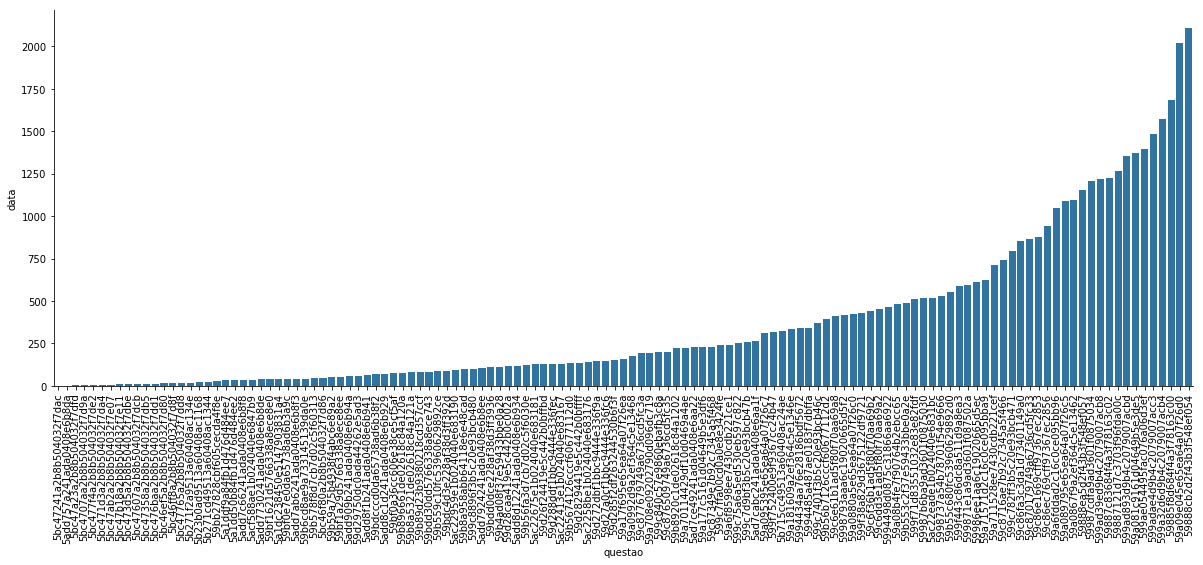

In [0]:
#Quantidade de questoes submetidas
print(merge_sub_lista['questao'].unique().shape) #perdemos as submissoes que não tinham associados a listas
#Quantidade de alunos que submeteram questoes
print(merge_sub_lista['user'].unique().shape)


#Grafico para mostrar a quantidade de vezes que uma questão foi submetida
import matplotlib.pyplot as plt
import seaborn as sns
QuanQuestao = merge_sub_lista.groupby(['questao']).count().sort_values(by=['data'])
QuanQuestao = QuanQuestao.reset_index()
GQuanQuestao = sns.FacetGrid(QuanQuestao,height=6, aspect=3, sharex=False)

GQuanQuestao.map(sns.barplot,"questao", "data")
plt.xticks(rotation=90)
plt.show()

**Quantidade de submissoes por lista**

In [0]:
a = merge_sub_lista.groupby(['titulo']).count()
a =a.reset_index()
a.sort_values(by=['titulo'])

,titulo,id_lista,questao,quantidade,data,porcentagemAcerto,user
0,Lista de Exercícios 1 - Expressões e variáveis,6897,6897,6897,6897,6897,6897
1,Lista de Exercícios 2 - Estruturas Condicionais,8614,8614,8614,8614,8614,8614
2,Lista de Exercícios 3 - Laço Condicional,6422,6422,6422,6422,6422,6422
3,Lista de Exercícios 4 - Laço contado,3175,3175,3175,3175,3175,3175
4,Lista de Exercícios 4.1 - Problemas tradiciona...,562,562,562,562,562,562
5,Lista de Exercícios 5 - Vetores,3777,3777,3777,3777,3777,3777
6,Lista de Laboratório 1 - Expressões Aritmética...,3368,3368,3368,3368,3368,3368
7,Lista de Laboratório 2 - Expressões Lógicas e ...,3514,3514,3514,3514,3514,3514
8,Lista de Laboratório 3 - Estruturas de Repeti...,2980,2980,2980,2980,2980,2980
9,Lista de Laboratório 4 - Repetição Contada,1389,1389,1389,1389,1389,1389


**Concatenar as tabelas merge_user_turmas e merge_sub_lista**




In [0]:
merge_sub_lista.rename(columns={"user":"id_aluno"}, inplace=True)
merge_user_turmas_sub_lista = pd.merge(right= merge_user_turmas, left = merge_sub_lista, on='id_aluno', how="inner")
print (merge_user_turmas_sub_lista.shape)
print(merge_user_turmas_sub_lista.columns)
merge_user_turmas_sub_lista.head(1)

(47675, 13)
Index(['id_lista', 'questao', 'titulo', 'quantidade', 'data',
       'porcentagemAcerto', 'id_aluno', 'ano', 'descricaoHorario',
       'descricaoTurma', 'id_turma', 'matricula', 'nome'],
      dtype='object')


,id_lista,questao,titulo,quantidade,data,porcentagemAcerto,id_aluno,ano,descricaoHorario,descricaoTurma,id_turma,matricula,nome
0,598cd57a3bc48946977dcf67,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5,2017-08-14T16:19:03.629Z,0,5991cd63b3c8b42f3d5da402,2017.2,24M12 2T12 (24/07/2017 - 26/11/2017),LÓGICA DE PROGRAMAÇÃO - Turma 01A,598e15296d8650eb27d52e3d,20170096736,LUCAS DANTAS


**Porcentagem Maxima por aluno em cada questão**

In [0]:
NotaMaxQuestao = merge_user_turmas_sub_lista.groupby(["id_lista","id_aluno","questao"]).max()
NotaMaxQuestao.rename(columns={"porcentagemAcerto":"porcentagemMaxima"}, inplace=True)
NotaMaxQuestao = NotaMaxQuestao.reset_index()
print(NotaMaxQuestao.columns)
NotaMaxQuestao.head(1)

Index(['id_lista', 'id_aluno', 'questao', 'titulo', 'quantidade', 'data',
       'porcentagemMaxima', 'ano', 'descricaoHorario', 'descricaoTurma',
       'id_turma', 'matricula', 'nome'],
      dtype='object')


,id_lista,id_aluno,questao,titulo,quantidade,data,porcentagemMaxima,ano,descricaoHorario,descricaoTurma,id_turma,matricula,nome
0,598cd57a3bc48946977dcf67,5991cb910be9d42f2f68b906,59885f8d684f4a3f78163c00,Lista de Laboratório 1 - Expressões Aritmética...,5,2017-08-14T16:29:10.522Z,100,2017.2,24M12 2T12 (24/07/2017 - 26/11/2017),LÓGICA DE PROGRAMAÇÃO - Turma 01A,598e15296d8650eb27d52e3d,20170039453,AMANDA


**Quantidade de questoes feitas por aluno em cada lista**

In [0]:
quantidade = NotaMaxQuestao.groupby(["titulo","id_aluno"]).count()
quantidade.rename(columns={"quantidade":"questoesFeitas"}, inplace=True)
quantidade= quantidade.reset_index()
quantidade= quantidade[["titulo","id_aluno","questoesFeitas"]]
print(quantidade.columns)
quantidade.head(1)


Index(['titulo', 'id_aluno', 'questoesFeitas'], dtype='object')


,titulo,id_aluno,questoesFeitas
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,11


**Nota final dos alunos por lista**

In [0]:
NotaLista = NotaMaxQuestao.groupby(["titulo","id_aluno"]).sum()
NotaLista.rename(columns={"porcentagemMaxima":"SomaLista", "quantidade":"questoesFeitas"}, inplace=True)
NotaLista = NotaLista.drop('ano',axis=1)
NotaLista= NotaLista.reset_index()
NotaLista = NotaLista[["titulo",'id_aluno','SomaLista']]
print(NotaLista.columns)
NotaLista.head(1)


Index(['titulo', 'id_aluno', 'SomaLista'], dtype='object')


,titulo,id_aluno,SomaLista
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,1100


In [0]:
mergeQuanNotaLista =  pd.merge(right= quantidade, left = NotaLista, on=['id_aluno','titulo'], how="inner")
print(mergeQuanNotaLista.columns)
print(mergeQuanNotaLista.shape)
mergeQuanNotaLista.head(1)


Index(['titulo', 'id_aluno', 'SomaLista', 'questoesFeitas'], dtype='object')
(6657, 4)


,titulo,id_aluno,SomaLista,questoesFeitas
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,1100,11


**Quantidade de questoes por lista**

In [0]:
quantQuesList = listaNovo[['quantidade','titulo']]
quantQuesList =quantQuesList.drop_duplicates()
print(quantQuesList.shape)
quantQuesList.head()



(23, 2)


,quantidade,titulo
0,5,Lista de Laboratório 1 - Expressões Aritmética...
5,5,Lista de Laboratório 2 - Expressões Lógicas e ...
10,18,Lista de Exercícios 2 - Estruturas Condicionais
28,15,Lista de Exercícios 3 - Laço Condicional
43,5,Lista de Laboratório 3 - Estruturas de Repeti...


**Concatenando as informações das tabelas mergeQuanNotaLista e quantidade para calcular o nota final de cada lista**

In [0]:
mergeQuanNotaListaQuanQ = mergeQuanNotaLista.join(quantQuesList.set_index('titulo'), on='titulo')
mergeQuanNotaListaQuanQ["NotaLista"]= mergeQuanNotaListaQuanQ["SomaLista"] /mergeQuanNotaListaQuanQ['quantidade']
print(mergeQuanNotaListaQuanQ.columns)
print(mergeQuanNotaListaQuanQ.shape)
mergeQuanNotaListaQuanQ.head(3)

Index(['titulo', 'id_aluno', 'SomaLista', 'questoesFeitas', 'quantidade',
       'NotaLista'],
      dtype='object')
(6657, 6)


,titulo,id_aluno,SomaLista,questoesFeitas,quantidade,NotaLista
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,1100,11,15,73.333333
1,Lista de Exercícios 1 - Expressões e variáveis,5991cd1a8907ca2f441cd313,500,5,15,33.333333
2,Lista de Exercícios 1 - Expressões e variáveis,5991cd34b3c8b42f3d5da3fd,600,6,15,40.000000


**Tabela final com todas as informações do aluno**

In [0]:
merge_user_turmas_sub_lista_M = merge_user_turmas_sub_lista[["titulo",'id_aluno', 'ano', 'descricaoHorario', 'descricaoTurma', 'id_turma','matricula','nome']]
mergeQuanNotaListaQuan_M = mergeQuanNotaListaQuanQ[['titulo', 'id_aluno','questoesFeitas', 'quantidade','NotaLista']]
tabelaFinal= mergeQuanNotaListaQuan_M.join(merge_user_turmas_sub_lista_M.set_index(['titulo','id_aluno']), on=['titulo','id_aluno'])
#remover as linhas duplicadas
tabelaFinal =tabelaFinal.drop_duplicates()
print(tabelaFinal.shape)
print(tabelaFinal.info())
tabelaFinal.head()

(7485, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 6656
Data columns (total 11 columns):
titulo              7485 non-null object
id_aluno            7485 non-null object
questoesFeitas      7485 non-null int64
quantidade          7485 non-null int64
NotaLista           7485 non-null float64
ano                 7485 non-null float64
descricaoHorario    7485 non-null object
descricaoTurma      7485 non-null object
id_turma            7485 non-null object
matricula           7485 non-null object
nome                7485 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 701.7+ KB
None


,titulo,id_aluno,questoesFeitas,quantidade,NotaLista,ano,descricaoHorario,descricaoTurma,id_turma,matricula,nome
0,Lista de Exercícios 1 - Expressões e variáveis,5991cb910be9d42f2f68b906,11,15,73.333333,2017.2,24M12 2T12 (24/07/2017 - 26/11/2017),LÓGICA DE PROGRAMAÇÃO - Turma 01A,598e15296d8650eb27d52e3d,20170039453,AMANDA
1,Lista de Exercícios 1 - Expressões e variáveis,5991cd1a8907ca2f441cd313,5,15,33.333333,2017.2,24M12 2T12 (24/07/2017 - 26/11/2017),LÓGICA DE PROGRAMAÇÃO - Turma 01B,598e15296d8650eb27d52e5f,20170038394,EMANUEL FERNANDES P. DA ROCHA


**Exportando o dataframe para um arquivo CSV**

In [0]:
tabelaFinal.to_csv(r'Lop.csv')

**Consulta por aluno**

In [0]:
tabelaFinal.loc[tabelaFinal["matricula"]=='20180029933',["titulo",'id_aluno', 'ano', 'id_turma','matricula','nome','questoesFeitas','NotaLista' ,'quantidade']]

,titulo,id_aluno,ano,id_turma,matricula,nome,questoesFeitas,NotaLista,quantidade
319,Lista de Exercícios 1 - Expressões e variáveis,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,8,51.666667,15
941,Lista de Exercícios 2 - Estruturas Condicionais,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,15,83.333333,18
1615,Lista de Exercícios 3 - Laço Condicional,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,7,46.666667,15
2153,Lista de Exercícios 4 - Laço contado,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,5,31.250000,16
2808,Lista de Exercícios 5 - Vetores,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,8,50.000000,16
3217,Lista de Laboratório 1 - Expressões Aritmética...,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,5,100.000000,5
3810,Lista de Laboratório 2 - Expressões Lógicas e ...,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,5,100.000000,5
4441,Lista de Laboratório 3 - Estruturas de Repeti...,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,3,60.000000,5
4915,Lista de Laboratório 4 - Repetição Contada,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,1,20.000000,5
5333,Lista de Laboratório 5 - Vetores,5b74c74a9513a60408ac2862,2018.2,5b7afe6db50b336749898165,20180029933,PEDRO PAULO,5,100.000000,5


**Media das notas das listas por ano**

In [0]:
ano2019 = tabelaFinal.loc[ (tabelaFinal["ano"] == 2018.1) & (tabelaFinal["titulo"].str.contains('Lista de Laboratório', regex=False)) ]
a = ano2019.groupby(["titulo","descricaoTurma","ano"]).mean()
a

questoesFeitas  ...  NotaLista
titulo                                             descricaoTurma                    ano                     ...           
Lista de Laboratório 1 - Expressões Aritméticas... LÓGICA DE PROGRAMAÇÃO - Turma 01A 2018.1        2.500000  ...  42.500000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01B 2018.1        3.833333  ...  66.666667
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01C 2018.1        3.666667  ...  66.666667
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01D 2018.1        3.200000  ...  60.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02A 2018.1        4.100000  ...  78.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02B 2018.1        3.400000  ...  62.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02C 2018.1        4.160000  ...  80.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02D 2018.1        3.714286  ...  66.666667
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03A 2018.1        3.388889  ...  58.233333
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03B 2018.1        2.600000  ...  46.666667
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03C 2018.1        4.777778  ...  88.888889
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03D 2018.1        4.000000  ...  70.000000
Lista de Laboratório 2 - Expressões Lógicas e E... LÓGICA DE PROGRAMAÇÃO - Turma 01A 2018.1        4.555556  ...  91.111111
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01B 2018.1        4.285714  ...  76.857143
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01C 2018.1        4.625000  ...  92.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01D 2018.1        3.428571  ...  68.571429
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02A 2018.1        3.833333  ...  73.666667
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02B 2018.1        4.750000  ...  89.750000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02C 2018.1        4.190476  ...  83.428571
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02D 2018.1        4.722222  ...  88.555556
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03A 2018.1        3.294118  ...  65.117647
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03B 2018.1        3.363636  ...  64.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03C 2018.1        4.666667  ...  92.222222
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 03D 2018.1        5.000000  ...  78.000000
Lista de Laboratório 3 -  Estruturas de Repetiç... LÓGICA DE PROGRAMAÇÃO - Turma 01A 2018.1        3.400000  ...  64.000000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01B 2018.1        2.450000  ...  48.740000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01C 2018.1        3.555556  ...  68.133333
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 01D 2018.1        1.777778  ...  33.155556
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02A 2018.1        3.250000  ...  62.275000
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02B 2018.1        3.428571  ...  68.571429
                                                   LÓGICA DE PROGRAMAÇÃO - Turma 02C 2018.1        3.500000  ...  69.420000
 